In [21]:
!pip install kagglehub

  Using cached kagglehub-0.3.12-py3-none-any.whl.metadata (38 kB)
  Using cached requests-2.32.4-py3-none-any.whl.metadata (4.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached charset_normalizer-3.4.2-cp311-cp311-win_amd64.whl.metadata (36 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.7.14-py3-none-any.whl.metadata (2.4 kB)
Using cached kagglehub-0.3.12-py3-none-any.whl (67 kB)
Using cached requests-2.32.4-py3-none-any.whl (64 kB)
Using cached charset_normalizer-3.4.2-cp311-cp311-win_amd64.whl (105 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached urllib3-2.5.0-py3-none-any.whl (129 kB)
Using cached certifi-2025.7.14-py3-none-any.whl (162 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

   ---------------------------------------- 0/7 [urllib3]
   ---------------------------------------- 0/7 [urllib3]
   -----------------------

In [22]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gauravtopre/bank-customer-churn-dataset")

print("Path to dataset files:", path)

c:\Users\Hp\Desktop\Customer Churn\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 187k/187k [00:00<00:00, 256kB/s]

Extracting files...
Path to dataset files: C:\Users\Hp\.cache\kagglehub\datasets\gauravtopre\bank-customer-churn-dataset\versions\1


In [23]:
for paths in os.listdir(r'C:\Users\Hp\.cache\kagglehub\datasets\gauravtopre\bank-customer-churn-dataset\versions\1'):
    print(paths)
    break


Bank Customer Churn Prediction.csv


In [24]:
df=pd.read_csv(r'C:/Users/Hp/.cache/kagglehub/datasets/gauravtopre/bank-customer-churn-dataset/versions/1/Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
df.to_csv(r'../data/raw/churn.csv',index=False)

In [29]:
import pandas as pd
import yaml

# Load config.yaml
with open('../config/config.yaml', 'r') as f:
    config = yaml.safe_load(f)

print(config)

raw_data_path = config['raw_data_path']

df = pd.read_csv(raw_data_path)

{'raw_data_path': '../data/raw/churn.csv'}


In [30]:
import os
print("Current Working Directory:", os.getcwd())


Current Working Directory: c:\Users\Hp\Desktop\Customer Churn\notebooks


In [31]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
df.shape

(10000, 12)

In [33]:
# check for missing values
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [34]:
df.duplicated().sum()

np.int64(0)

In [35]:
# check for column dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [16]:
# drop null values
df_copy=df.copy()
df_copy=df_copy.dropna()

In [37]:
import numpy as np
numerical_df=df_copy.select_dtypes(include=np.number)
categorical_df=df_copy.select_dtypes(exclude=np.number)

In [38]:
numerical_df.head()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
0,2.0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0
1,3.0,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0
2,4.0,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0
3,5.0,58.0,38.0,21.0,7.0,7.0,396.0,29.0,1.0
4,6.0,23.0,32.0,20.0,5.0,8.0,617.0,20.0,1.0


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Usage Frequency'}>],
       [<Axes: title={'center': 'Support Calls'}>,
        <Axes: title={'center': 'Payment Delay'}>,
        <Axes: title={'center': 'Total Spend'}>],
       [<Axes: title={'center': 'Last Interaction'}>,
        <Axes: title={'center': 'Churn'}>, <Axes: >]], dtype=object)

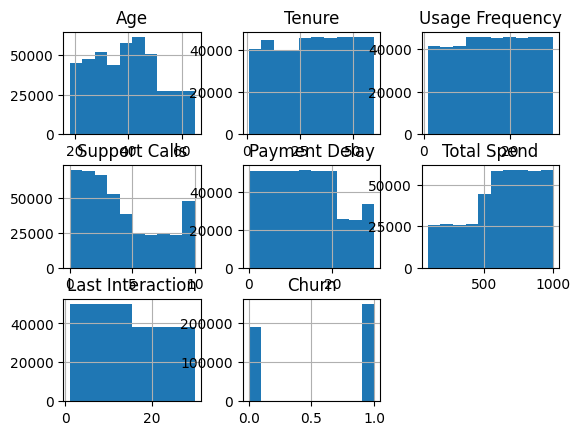

In [44]:
import matplotlib.pyplot as plt

numerical_df.drop(columns='CustomerID').hist(bins=10)